# Artificial Intelligence 1 Week 5 Practical
### Goals
This session is designed to give you experience of:
- loading an unlabelled dataset in python
- creating 'Data Visualisations' --such ad 2D and 3D scatter plots with differenbt colourings to examine the relationships between the values of different features
     in your data set
- running the unsupervised clustering algorirthm 'k-Means' and examining the effect of:
   - different settings for parameters such as the number of clusters
   - applying 'normalisation' so that all of your features lie in the same range
   - 'noisy' or uniformative features
    

### By the end of this session you should have

- Understood how to go about visualising a new data set
- Understood how to find clusters - if they exist - in your data.
- Understood the importance of selecting and applying suitable  data preprocessing methods

### Before next week you should have
- Completed the exercises below for the Iris dataset
- Expanded the domain-specific knowledge contents of your revision bot with definitions and examples for all the other key concepts covered so far.

### Additional Resources
- **Seaborn** is a richer  library you can import into notebookjs  for easily making visualisations. Try looking at the example gallery from here: https://seaborn.pydata.org
         
- There is lots of help available for producing plots in matplotlib - if in doubt, just google your error!

- **plotly** is a fantastic toolkit for making realy nice data visualisations where you can link different plots so they respond teogether as you zoom/pan/select different features to look at.   
  - You can install it locally and run within a notebook,  but this is probably too complex to go into in this module.
  - but you can upload your data and create really nice visualisations here: https://chart-studio.plotly.com/create/#/
  
<div class="alert alert-block alert-warning"> <b>REMEMBER:</b> There is lots of help available for producing plots in matplotlib - and in fact with almost any python problem.  If in doubt, just google your error!</div>

<div class="alert alert-block alert-danger"> <b>REMEMBER:</b> You need to make sure you are running this code within the virtual environment you created using 'AIenv'.<br> In Jupyter click on the kernel menu then change-kernel. In VSCode use the kernel selector in the top-right hand corner </div>

# Part 1: Creating and adapting a simple data visualisation
## Get the data: in this case  a classic data set: Iris flowers <img src="../lectures/figures/ML/Iris-image.png" style="float:right">
This is a classic Machine Learning Data set
- 4 measurements (features): sepal and petal width and length
- 50 examples  from each  sub-species for iris flowers
- three class problem: Iris-Virginica, Iris-Setosa or Iris-Versicolor

### For the purpose of this tutorial we are going to ignore the fact that we are provided with class labels

Run the next cell to import some useful libraries and then load the iris dataset into two arrays
- irisX (the features - 150 rows x 4 columins)
- irisy (the class labels - we'll ignore these)

We'll also make a list of the feature names so we can use them to label our plots.

In [3]:
# load the data
from sklearn.datasets import load_iris
import numpy as np

irisX,irisy = load_iris(return_X_y = True)

feature_names = ['sepal width','sepal_length','petal_width','petal_length']



## Now we will see how we can use the matplotlib library to create a scatter plot

For this first plot we will just look at the first two features

<div class="alert alert-block alert-info"> <b>ASIDE: Python arrays and slicing:</b> Python has a numpy module with lots of useful code for doing math, and creating and manipulating arrays of data <br>If we have a 2D numpy array X  we can select just parts of it - i.e. groups of rows, or colums, by "slicing". <br> We specify the range of rows we want, then the range of coulmns using X[startRow: endRow, startCol: endCol] (the endRow and endCol are not included).<br> For example, if (as in ths case) X has 150 rows and 4 columns then:
 <ul>
     <li> A = X[0:50, :].  A is a 2d array containing the first 50 rows, and all 4 columns</li>
     <li> B = X[ : , 3:].   B is a 1D array with 150 rows and  the columns 3 and onwards (in this case, it is just the last)<br>
     <li> C = X[ 0: 2, 0:4] C is a 2D array with 3 rows and 4 columns <br></div>


### We'll start by just using the first two features and creating a basic scatter plot

In [4]:
# select every row and just the first|second column into two 1-D arrays for the x and y axes
xaxis_feature= 0
yaxis_feature = 1
x = irisX[:, xaxis_feature : xaxis_feature +1]
y = irisX[:,yaxis_feature: yaxis_feature+1 ]

To do this we'll call matplotlib.pyplot to create a canvas (fig) with a single subplot on it.

- Like most things in python, you can achieve the same effect in many different ways
- There's a really good thread here: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
about why most peoiple choose to do it this way.
- As a heavily upvoted answer says:
> plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway

- As you'll see shortly,   you can use the same syntax to put multiple plots in a grid within one figure


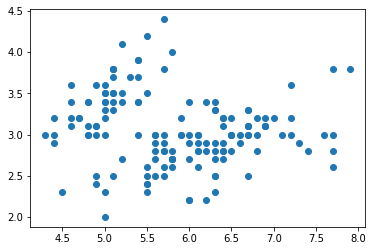

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()
ax.scatter(x,y)

### Now lets add some 'decoration' to the plot so it is more informative

Text(0, 0.5, 'sepal_length')

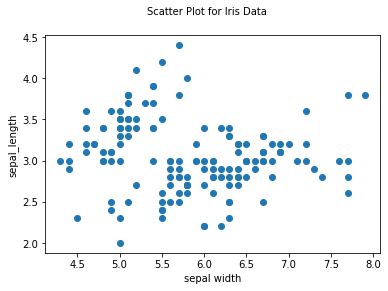

In [6]:
fig,ax = plt.subplots()
ax.scatter(x,y)
## Lets start with a title
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=10)

# and add some axis labels: recall we stored these in the list "feature_names" in case they were useful
ax.set_xlabel(feature_names[0], fontsize=10)
ax.set_ylabel(feature_names[1],fontsize=10)

## Activity 1: Creating and formatting simple 2D visualisations

### Activity 1.1: Looking at different combinations of features 
- The cell below contains the all code used above to generate the scatter plot.
- Edit the first two lines then  run the changed version to examine the effect of looking at different combinations of variables (there are 12 altogether)
  - Note that  the code that sets the axis labels is no longer hard coded to the labels for features 0 and 1 
- Then run the cell below that to answer a question about the data

Text(0, 0.5, 'sepal_length')

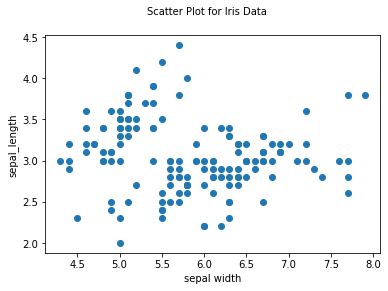

In [7]:
# select the features to show
xaxis_feature= 0
yaxis_feature = 1
x = irisX[:, xaxis_feature : xaxis_feature +1]
y = irisX[:,yaxis_feature: yaxis_feature+1 ]

#create the scatter plot
fig,ax = plt.subplots()
ax.scatter(x,y)
## Lets start with a title
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=10)

# and add some axis labels: recall we stored these in the list "feature_names" in case they were useful
ax.set_xlabel(feature_names[xaxis_feature], fontsize=10)
ax.set_ylabel(feature_names[yaxis_feature],fontsize=10)

In [8]:
import workbook5_mcq
display(workbook5_mcq.Q1)

### Activity 1.2 Formatting to your plot and saving it to file
This code example sets the overall title' for the figure object, and the axis-labels, and their font sizes
1. Change the font-size of both to something more readable on your screen
2. Experiment with setting the total figure size using:  
  ```` fig.set_size_inches(10, 5)```` after you have created it via the call to subplots **or**   
   ```` fix,ax = plt.subplots(figsize=(10, 5))```` at the time when you create it.  
  You will probably want to change these numbers to something appropriate to your screen.  
  **In practice** you usually only use one of these methods.
  
  
3. Experiment with changing the marker  style, colour, and size. For example try changing:     
    ```ax.scatter(x,y)``` to ```ax.scatter(x,y,c='red',marker = '^',s=10)```  
   The default circle marker is 'o', try with other symbols such as: '.', 's', 'v', '+','x'


4. When you are happy you have found a plotthat displays the data well, save it adding the command ```` fig.savefig("your_filename.png")````
 - obviously change the filename to something more informative such as the names of the features you are displaying
 -  pyplot supports saving in lots of different file formats (jpg, png,svg). 
 -  and you can change things like the resolution (dpi)  
 -  See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html 
  

Text(0, 0.5, 'sepal_length')

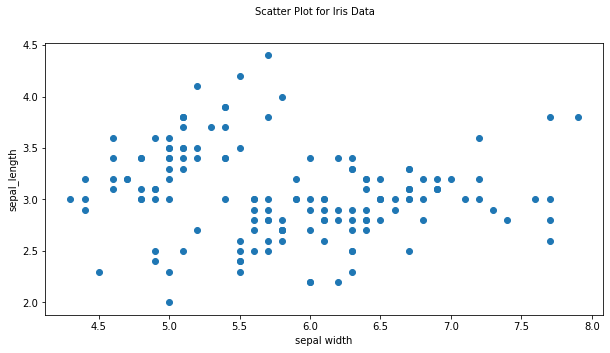

In [9]:
# edit the next two lines of  code  to choose a good combinations of features you found
xaxis_feature= 0
yaxis_feature = 1
x = irisX[:, xaxis_feature : xaxis_feature +1]
y = irisX[:,yaxis_feature: yaxis_feature+1 ]

# experiment with these two ways of changing the size
fig,ax = plt.subplots(figsize=(10,5))
fig.set_size_inches(10,5)

# exeriment wiuth changing the colours and shapes of markers here
ax.scatter(x,y)


## useful information to display
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=10)
ax.set_xlabel(feature_names[xaxis_feature], fontsize=10)
ax.set_ylabel(feature_names[yaxis_feature],fontsize=10)

# when you're happy add the savefig commamnd here

### Answer these questions to check you understood the formatting

In [ ]:
display(workbook5_mcq.Q2)
display(workbook5_mcq.Q3)
display(workbook5_mcq.Q4)

## Making the visualisations Interactive

One major advantage of juptyer notebooks is that we can use them to make interactive figures.  
Since we can also "hide" the code cells, and host notebooks,  
that means we can make interactive presentations
to distribute to other people.

For now, we will focus on adding the ability to pan, zoom, rescale, and save changed figures to file with the click of a button.

<img src = "matplotlibNoteBookInteractions.png" style="float:right" width=400>
The code in the cell below is a version of what you saw already with the exception of the  first line: ```%matplotlib notebook```.  
This is not  python it is a 'jupyter magic' command, and has to be at the top of a cell.  
This turn turns on  a jupyter feature  which lets us make interactive graphics.




There's a nice [blog about interactive notebooks here](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1) which is where I copied the image from

### Activity 1.3: Using interactive visualisations
Run the code and work out which buttons let you pan/zoom/resave/save to file.  
Hint: If you have clicked on the button with 4 arrows, you should be able to move the whole viewpoint (pan)  
and also 'rescale' (squeeze/expand) the data just along one axis 
  depending on whether you are using left/right mouse buttons (1 / 2 figure drags on a trackpad).  
**Note that you can only have one  interaction active at  a time, so when you are done, click on the blue exit button**


<IPython.core.display.Javascript object>


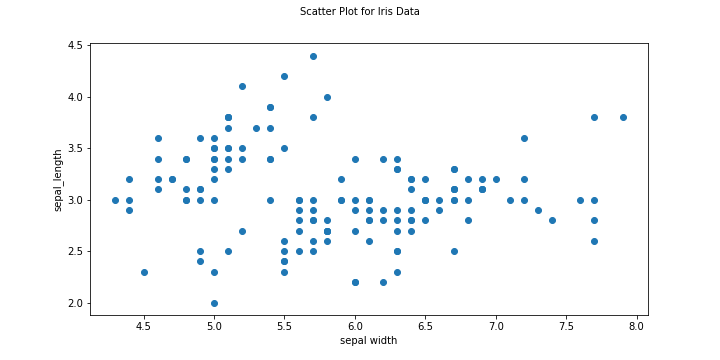

Text(0, 0.5, 'sepal_length')

In [10]:
%matplotlib notebook


xaxis_feature= 0
yaxis_feature = 1
x = irisX[:, xaxis_feature : xaxis_feature +1]
y = irisX[:,yaxis_feature: yaxis_feature+1 ]

fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(x,y)


## useful information to display
title= fig.suptitle("Scatter Plot for Iris Data", fontsize=10)
ax.set_xlabel(feature_names[xaxis_feature], fontsize=10)
ax.set_ylabel(feature_names[yaxis_feature],fontsize=10)

# Part 2: Using the k-Means algorithm to discover clusters in the data

## Example of how to use the code
The next cell demonstrates how to call the implementation of KMeans in python's sklearn module.


In [ ]:
# Example
from sklearn.cluster import KMeans

# in this case we will create a kMeans model that just looks for two clusters
## call the constructor
clusterModel = KMeans(n_clusters=2)

## most of the ML models in sklearn provide both a fit() and a predict() method
## in this case 'fitting' the model means finding the best clsuter centres as descirbed in the lecture
clusterModel.fit(irisX)

### Lets ask it what it found!

When the model was fitted to our data it stores the cluster centres it found as an attribute, so we will start by printing that.
- The outputs will be a "list of 1-D arrays" - effectively a 2d array with one row for each cluster centre, and one column for each variable
- In this case, the Iris data has four features to represent each of the examples.
- So each row represents the co-ordinates in 4-D space of one the cluster centres

In [ ]:
print ( clusterModel.cluster_centers_ )

Most classes of sklearn models implement a predict() method.  
For KMeans, that  outputs the index of the nearest cluster center to each data point
- So the next cell calls this method on our kMeans object, stores the result, then prints it out.
- The output will be a list with one 'cluster-id' for each example in the data set.
  - Thus if the Nth entry is a 0 it means that data item N has been assigned to (is  "in") cluster 0.
  - Where the one whose centre was at row 0 when we listed the cluster centres just above.

In [15]:
cluster_ids = clusterModel.predict(irisX)
print(cluster_ids) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Activity 2: Grouping unlabelled  data using the kMeans Unsupervised Learning method
### Activity 2.1: Using visualisations to determine how many clusters to use
Copy the clustering code into the cell below followed by the code to produce what you think is the most 'informative' scatter plot (the best pair of features)
- Change and rerun the code  to inestigate what happens if you specify  2,3,4,5 clusters
  - Apply k-means as above to obtain the list 'cluster_ids'  that holds the label for each datum
  - Visualise all the scatterplots, adapting  your code so that it colours markers by cluster by changing  
    ```ax.scatter(x,y)```   to ```ax.scatter(x,y,c=cluster_ids)```
    
Make a decision what number of clusters 'looks' a best fit to the data.

In [ ]:
## Copy the code that finds the cluster here



## then put the code that make a simnple scatter plot here

## remember ot change the call to ax.scatter() to use different oloured markerrs for different clusters

### Activity 2.2: Investigate the effect of differently scaled data
**First** we will investigate what could happen if your measurements are in different units,  so one feature has values spanning a bigger range.
- make a copy of the iris data and convert the second  feature from cm to mm,  
  then rerun kMeans (for your preferred number of clusters) and visualisation to see what difference it makes
  you can create the version of the data using code like:  
``` irisXscaled = copy.deepcopy(irisX)
  irisXscaled [:, 1:2] *=10 ```   
  and then select some of the columns and pass them into your graphing code in the same way you did for the irisX data. 
  

In [ ]:
import copy
# 1. put your code to change the data here


# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXscaled in three places



# 3. then put your visualisation code here - but select x and y from irisXscaled instead of irisX



### Activity 2.3 Using preprocessing so all the features have equal importance in kMeans distance calculations.  
As well as classes for different types of models, sklearn provides many preprocessing classes.  
Like models these implement a 'fit()' method,  but instead of `predict()' they have a 'transform()' method. 

A common way to make each feature equally important is to transform each one so that its values lie between 0 and 1.   
Assuming as usual  we store our set of examples as rows in an array X, with a  column for each features.  
For each individual feature j (column in X) it: 
- finds the highest (Xjmax) and lowest (Xjmin) values  
- subtracts the Xjmin from each value so that they now start from 0
- divide each value by the 'range' (Xjmax-Xjmin) so the upper value (Xjmax) is now 1
  
  
- Add the folowing lines to your code to get the preprocessed data.  
  ```scaler = sklearn.preprocessing.MinMaxScaler()
  scaler.fit(irisX)
  irisXnormalised = scaler.transform(irisX)``` 
  

  
- Rerun the clustering then visualisation for this normalised data and observe the difference.

In [2]:
import copy, sklearn
# 1. put your code to change the data here

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXnormalised in two plces



# 3. then put your visualisation code here - but select x and y from irisXnormalised instead of irisX



**Decide for yourself which of the three sets of visualisation is clearer**  
Then run the cell below and answer the questions to check your understanding
 

In [ ]:

display(workbook5_mcq.Q5)
display(workbook5_mcq.Q6)

### Activity 2.4: Examining the robustness of kMeans to the presence of noisy features
- Create a new feature of 'salt and pepper' noise i.e. the values in odd rows are 0.9, the values in even rows are 0.1
- Use np.append() to add this to the preprocessed irisData
- rerun kMeans and see what happens

**MCQ**: What is the effect on kMeans clustering of the noisy features? [ none | unstable]**  
Thought experiment based on your understanding  
**MCQ**: What do you prtedict would happen if each value had been measured using a 'noisy' sensor i.e. a random value from the range [-0.2,0.2] was added to each value in X: Results stay broadly the same | still able to distringuish one class but not the two others | unable to reliably identify distinct clusters


# Part 3: Making more complex visualisations with matplotlib 

The method defined below uses the power of matplotlib subplots to make a canvas (figure) containing a grid of plots (axes).  
It 'asks' the parameter X (the data) how many features (columns) it has then uses loops to plot all the different scatterplots in a grid. 
It also takes a second paramter y  to colour the  markers

After defining the methods the final line calls it for the iris feature values and the clusterids we found with the twoClusterModel.  


You should see that in 'interactive' mode,  panning and zooming now works independently in each subplot.  


### Activity 3.1 Showing the scatter plot matrix for your 'preferred' version of the data
Edit the code  in the cell below  to pass in the version of the data, and the array of cluster labels found by kMeans, that you think represent the best visualisation of the data.  
Hint: This means that you will need to choose k, and either irisX, irisXscaled or irisXnormalised  


In [ ]:
# choose your data
myData = irisX # or irsXscaled or irisXnormalised
# chose the value of K
K=1
# create the cluster labels
clusterModel = KMeans(n_clusters=K)
clusterModel.fit(myData)
cluster_ids = clusterModel.predict(myData)


def show_scatterplot_matrix(X,y,featureNames,title=None):
    f = X.shape[1]
    if(len(y) != X.shape[0]):
        print("Error,   the y array  must have the same length as there are rows in X")
        return
    fig, ax = plt.subplots(f,f,figsize=(12,12))
    plt.set_cmap('jet')
    for feature1 in range(f):
        ax[feature1,0].set_ylabel( featureNames[feature1])
        ax[0,feature1].set_xlabel( featureNames[feature1])
        ax[0,feature1].xaxis.set_label_position('top') 
        for feature2 in range(f):
            xdata = X[:,feature1]
            ydata = X[:,feature2]
            ax[feature1, feature2].scatter(xdata,ydata,c=y)

    if title != None:
        fig.suptitle(title,fontsize=16,y=0.925)

show_scatterplot_matrix(myData,cluster_ids,feature_names,title="Interactive  visualisation of the Iris Data")

### Activity 3.2:  Change the code to show a histogram on the leading diagonal
i.e. 
```
    if (feature1==feature2):
        existing code to draw scatterplot
    else:
        code to draw histogram of observed values using plt.axis.hist(xdata) 
 ```
        
        
You may need to consult [the documentation for the axis.hist() method](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.hist.html?highlight=hist#matplotlib.axes.Axes.hist  )      

### Activity 3.3: Stretch activity for the more experienced python programmers
It would be nice if the histograms also had different colours for different cluster labels.  
To do that you need to  split the irisData into three subsets according to your clustered class labels, then either:
- make three seperatae calls to the you could adapt code from he examples at the bottom of the matplotlib page linked above
- or pass the three subsets as a list i.e. ```ax[feature1,feature2].hist(x=(subset1,subset2,subset3))```